In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import csv
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Creation of dataframes of the different csv files
dataframes = []
for dirname, _, filenames in os.walk('./datasets/1_SEGMENTATION'):
    for filename in filenames:
        file = filename.replace('.csv', '_df')
        filepath = os.path.join(dirname, filename)
        # Sniff the delimiter using csv.Sniffer
        with open(filepath, 'r', newline='') as csvfile:
            sniffer = csv.Sniffer()
            dialect = sniffer.sniff(csvfile.read(4096))  # Read a sample to sniff
            separator = dialect.delimiter
        # Read the CSV file with the detected separator
        df = pd.read_csv(filepath, sep=separator, encoding="UTF-8")
        globals()[file] = df.copy()
        dataframes.append(df)
        print(file,'-','\n','Rows:',df.shape[0],'\n','Columns:',df.shape[1])
print('Data imported')

RETAIL.txt - 
 Rows: 20 
 Columns: 1
RETAIL_PRODUCT_df - 
 Rows: 2800 
 Columns: 3
RETAIL_REGISTRY_df - 
 Rows: 25727 
 Columns: 4
RETAIL_SALES_df - 
 Rows: 489967 
 Columns: 6
RETAIL_SALES_DETAIL_df - 
 Rows: 2047073 
 Columns: 6
RFM_Final_df - 
 Rows: 25727 
 Columns: 24
Data imported


In [5]:
# Assigning the dataframes to the corresponding variables
rp_df = RETAIL_PRODUCT_df
rr_df = RETAIL_REGISTRY_df
rs_df = RETAIL_SALES_df
rsd_df = RETAIL_SALES_DETAIL_df

In [6]:
# Merge the dataframes to create a unique dataframe
df = rsd_df.merge(rs_df, how = 'inner', on = ['CUSTOMER_ID', 'DATE'] )

In [7]:
# Merge the retail sales and retail sales detail to retail product
df = df.merge(rp_df, how = 'inner', on = ['PRODUCT_ID'], )
df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC
0,BF00404312,2020-01-17,1068,1.0,6.85,NaN,14,CASH,15:06:37,-3960.0,3,READY-MADE
1,WG00404070,2020-01-21,1068,4.0,27.40,NaN,105,CASH,17:24:16,615.0,3,READY-MADE
2,EB00404430,2020-01-26,1068,1.0,6.95,NaN,14,CASH,09:49:34,-3275.0,3,READY-MADE
3,WD04132126,2019-10-08,1068,1.0,6.85,NaN,14,DEBIT CARD,16:11:57,1130.0,3,READY-MADE
4,DK00406358,2019-06-08,1068,2.0,13.70,NaN,14,CASH,17:38:48,385.0,3,READY-MADE


In [8]:
# Merge df to retail registry
df = df.merge(rr_df, how = 'inner', on = ['CUSTOMER_ID'])

In [9]:
# Fill the missing values with 0 in the special column
df['SPECIAL'] = df['SPECIAL'].fillna(0)

In [10]:
# Replace the values of the column special with 1 if the value is different from 0
df['SPECIAL'].replace({'Y': 1}, inplace = True)
df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,CATEGORY_ID,CATEGORY_DESC,CREATION_DATE,REGIONAL_CODE,ORIGIN
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,3,READY-MADE,2003-04-02,23,WEB
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,3,READY-MADE,2003-04-02,23,WEB
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,7,FISH,2003-04-02,23,WEB
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,7,FISH,2003-04-02,23,WEB
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,7,FISH,2003-04-02,23,WEB


In [11]:
# Descibe the dataframe
df.describe()

,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,TOTAL_POINTS,CATEGORY_ID,REGIONAL_CODE
count,2.047962e+06,2.047962e+06,2.026404e+06,2.047962e+06,2.047962e+06,1.994093e+06,2.047962e+06,2.047962e+06
mean,7.404719e+04,1.136169e+00,8.106861e+00,1.851109e-03,4.941574e+01,8.663137e+01,6.030331e+00,3.145012e+01
std,7.769339e+04,1.714687e+00,5.661384e+00,4.298468e-02,3.592643e+01,1.644398e+03,3.981517e+00,1.970878e+01
min,3.600000e+01,-4.800000e+01,-3.048000e+02,0.000000e+00,0.000000e+00,-1.469150e+05,0.000000e+00,1.000000e+00
25%,2.942000e+03,1.000000e+00,4.950000e+00,0.000000e+00,1.700000e+01,1.650000e+02,3.000000e+00,1.300000e+01
50%,4.417800e+04,1.000000e+00,6.950000e+00,0.000000e+00,3.800000e+01,2.850000e+02,6.000000e+00,3.000000e+01
75%,1.387970e+05,1.000000e+00,9.950000e+00,0.000000e+00,8.100000e+01,4.400000e+02,1.000000e+01,4.700000e+01
max,2.537530e+05,1.000000e+03,3.704500e+02,1.000000e+00,1.410000e+02,9.180000e+03,1.600000e+01,8.200000e+01


In [12]:
# Descriptive statistics of the dataframe
df.describe(include = 'object')

,CUSTOMER_ID,DATE,PAYMENT_METHOD,TIME,CATEGORY_DESC,CREATION_DATE,ORIGIN
count,2047962,2047962,2047962,2047962,2047962,2046716,2047962
unique,25727,498,5,45232,13,6130,4
top,LT01053024,2019-11-13,CASH,11:34:47,READY-MADE,2003-03-20,WEB
freq,938,6861,1312025,172,559353,2844,1372988


In [13]:
# Find the isnan values in the dataframe
df.isna().sum()

CUSTOMER_ID           0
DATE                  0
PRODUCT_ID            0
QUANTITY              0
LIST_PRICE        21558
SPECIAL               0
OUTLET_ID             0
PAYMENT_METHOD        0
TIME                  0
TOTAL_POINTS      53869
CATEGORY_ID           0
CATEGORY_DESC         0
CREATION_DATE      1246
REGIONAL_CODE         0
ORIGIN                0
dtype: int64

In [14]:
# Fill the TOTAL_POINTS and LIST_PRICE column na values with 0
df['TOTAL_POINTS'] = df['TOTAL_POINTS'].fillna(0)
df['LIST_PRICE'] = df['LIST_PRICE'].fillna(0)

In [15]:
# Convert date to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [16]:
df.isna().sum()

CUSTOMER_ID          0
DATE                 0
PRODUCT_ID           0
QUANTITY             0
LIST_PRICE           0
SPECIAL              0
OUTLET_ID            0
PAYMENT_METHOD       0
TIME                 0
TOTAL_POINTS         0
CATEGORY_ID          0
CATEGORY_DESC        0
CREATION_DATE     1246
REGIONAL_CODE        0
ORIGIN               0
dtype: int64

In [17]:
# Fill the NaN values in CREATION_DATE with the earliest date in the DATE column based on the CUSTOMER_ID
df['CREATION_DATE'] = df['CREATION_DATE'].fillna(df.groupby('CUSTOMER_ID')['DATE'].transform('min'))

In [18]:
# Check the datatypes of the columns
df.dtypes

CUSTOMER_ID               object
DATE              datetime64[ns]
PRODUCT_ID                 int64
QUANTITY                 float64
LIST_PRICE               float64
SPECIAL                    int64
OUTLET_ID                  int64
PAYMENT_METHOD            object
TIME                      object
TOTAL_POINTS             float64
CATEGORY_ID                int64
CATEGORY_DESC             object
CREATION_DATE             object
REGIONAL_CODE              int64
ORIGIN                    object
dtype: object

In [19]:
# Convert CREATION_DATE to datetime
df['CREATION_DATE'] = pd.to_datetime(df['CREATION_DATE'])

In [20]:
# Rename 'CHECK' to 'CHEQUE' in PAYMENT_METHOD column
df['PAYMENT_METHOD'].replace({'CHECK': 'CHEQUE'}, inplace = True)

In [21]:
# Confirm the dtypes
df.dtypes

CUSTOMER_ID               object
DATE              datetime64[ns]
PRODUCT_ID                 int64
QUANTITY                 float64
LIST_PRICE               float64
SPECIAL                    int64
OUTLET_ID                  int64
PAYMENT_METHOD            object
TIME                      object
TOTAL_POINTS             float64
CATEGORY_ID                int64
CATEGORY_DESC             object
CREATION_DATE     datetime64[ns]
REGIONAL_CODE              int64
ORIGIN                    object
dtype: object

In [22]:
# Determination of a customer's longevity based on the difference between the date of the first purchase and the date a custom date
df['LONGEVITY'] = (df['DATE'] - df['CREATION_DATE']).dt.days

# If the customer doesn't have a CREATION_DATE, the LONGEVITY is earliest date per the CUSTOMER_ID
df['LONGEVITY'] = df['LONGEVITY'].fillna(df.groupby('CUSTOMER_ID')['LONGEVITY'].transform(lambda x: x.fillna(x.min())))

In [23]:
# Extract the hour from the LONGEVITY column and convert it to int
def extract_hour(time_str):
    return int(time_str.split(':')[0])

df['TRANSACTION_HOUR'] = df['TIME'].apply(extract_hour)

# Add a column that shows the hour of the transaction as a period in the day (morning, afternoon, evening, night)
def time_of_day(hour):
    if hour >= 6 and hour < 12:
        return 'morning'
    elif hour >= 12 and hour < 18:
        return 'afternoon'
    elif hour >= 18 and hour < 24:
        return 'evening'
    else:
        return 'night'
    
df['TIME_OF_DAY'] = df['TRANSACTION_HOUR'].apply(time_of_day)

df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year
df['DAY'] = df['DATE'].dt.day
df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek
df['MONTH_NAME'] = df['DATE'].dt.strftime('%B')

df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,REGIONAL_CODE,ORIGIN,LONGEVITY,TRANSACTION_HOUR,TIME_OF_DAY,MONTH,YEAR,DAY,DAY_OF_WEEK,MONTH_NAME
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960.0,...,23,WEB,6134,15,afternoon,1,2020,17,4,January
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315.0,...,23,WEB,5700,18,evening,11,2018,9,4,November
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960.0,...,23,WEB,6134,15,afternoon,1,2020,17,4,January
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565.0,...,23,WEB,5980,18,evening,8,2019,16,4,August
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430.0,...,23,WEB,6066,14,afternoon,11,2019,10,6,November


In [24]:
# Calculation of the difference in time of the creation date and the date columns
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

def get_month(x): return datetime(x.year, x.month, 1)

In [45]:
# Creation of Invoice_Month and Cohort_Month columns
df['INVOICE_MONTH'] = df['DATE']

df['INVOICE_MONTH'] = df['INVOICE_MONTH'].apply(get_month)
grouping = df.groupby('CUSTOMER_ID')['INVOICE_MONTH']
df['COHORT_MONTH'] = grouping.transform('min').apply(get_month)

df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,TIME_OF_DAY,MONTH,YEAR,DAY,DAY_OF_WEEK,MONTH_NAME,INVOICE_MONTH,COHORT_MONTH,COHORT_INDEX,POINTS_SPENT
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,afternoon,1,2020,17,4,January,2020-01-01,2018-07-01,19,3960
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,...,evening,11,2018,9,4,November,2018-11-01,2018-07-01,5,0
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,...,afternoon,1,2020,17,4,January,2020-01-01,2018-07-01,19,3960
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565,...,evening,8,2019,16,4,August,2019-08-01,2018-07-01,14,0
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430,...,afternoon,11,2019,10,6,November,2019-11-01,2018-07-01,17,0


In [46]:
invoice_year, invoice_month, _ = get_date_int(df, 'INVOICE_MONTH')
cohort_year, cohort_month, _ = get_date_int(df, 'COHORT_MONTH')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df['COHORT_INDEX'] = (years_diff * 12) + months_diff + 1

df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,TIME_OF_DAY,MONTH,YEAR,DAY,DAY_OF_WEEK,MONTH_NAME,INVOICE_MONTH,COHORT_MONTH,COHORT_INDEX,POINTS_SPENT
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,afternoon,1,2020,17,4,January,2020-01-01,2018-07-01,19,3960
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,...,evening,11,2018,9,4,November,2018-11-01,2018-07-01,5,0
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,...,afternoon,1,2020,17,4,January,2020-01-01,2018-07-01,19,3960
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565,...,evening,8,2019,16,4,August,2019-08-01,2018-07-01,14,0
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430,...,afternoon,11,2019,10,6,November,2019-11-01,2018-07-01,17,0


In [47]:
# Customer Retention Grouping
retention_grouping = df.groupby(['COHORT_MONTH', 'COHORT_INDEX'])
cohort_data = retention_grouping['CUSTOMER_ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='COHORT_MONTH', columns='COHORT_INDEX', values='CUSTOMER_ID')

print(cohort_counts)

COHORT_INDEX       1       2       3       4       5       6       7       8   \
COHORT_MONTH                                                                    
2018-06-01      957.0   595.0   842.0   841.0   843.0   859.0   831.0   830.0   
2018-07-01    10525.0  9284.0  9192.0  9157.0  8927.0  8621.0  9251.0  9069.0   
2018-08-01     6465.0  4978.0  5149.0  4936.0  4686.0  5160.0  5060.0  5036.0   
2018-09-01     1228.0   829.0   824.0   739.0   829.0   809.0   844.0   840.0   
2018-10-01      452.0   268.0   241.0   289.0   270.0   279.0   282.0   276.0   
2018-11-01      242.0   117.0   146.0   153.0   137.0   139.0   138.0   114.0   
2018-12-01      249.0   170.0   179.0   166.0   168.0   160.0   135.0   105.0   
2019-01-01      334.0   241.0   242.0   236.0   237.0   189.0   139.0   210.0   
2019-02-01      513.0   375.0   380.0   352.0   301.0   218.0   337.0   304.0   
2019-03-01      568.0   435.0   442.0   356.0   245.0   396.0   355.0   349.0   
2019-04-01      624.0   454.

In [102]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention = retention.round(3)*100
retention = retention.round(1)

retention.index = retention.index.strftime('%Y-%m')
retention = retention.apply(pd.to_numeric, errors='coerce')

# Set NaN values to 0
retention = retention.fillna(0)

print(retention)

COHORT_INDEX     1     2     3     4     5     6     7     8     9     10  \
COHORT_MONTH                                                                
2018-06       100.0  62.2  88.0  87.9  88.1  89.8  86.8  86.7  88.9  89.1   
2018-07       100.0  88.2  87.3  87.0  84.8  81.9  87.9  86.2  86.8  88.3   
2018-08       100.0  77.0  79.6  76.3  72.5  79.8  78.3  77.9  79.6  77.3   
2018-09       100.0  67.5  67.1  60.2  67.5  65.9  68.7  68.4  66.4  55.0   
2018-10       100.0  59.3  53.3  63.9  59.7  61.7  62.4  61.1  54.0  33.6   
2018-11       100.0  48.3  60.3  63.2  56.6  57.4  57.0  47.1  33.5  49.2   
2018-12       100.0  68.3  71.9  66.7  67.5  64.3  54.2  42.2  63.9  64.7   
2019-01       100.0  72.2  72.5  70.7  71.0  56.6  41.6  62.9  63.8  60.2   
2019-02       100.0  73.1  74.1  68.6  58.7  42.5  65.7  59.3  63.4  53.0   
2019-03       100.0  76.6  77.8  62.7  43.1  69.7  62.5  61.4  56.7  53.2   
2019-04       100.0  72.8  68.3  45.4  69.7  60.6  57.4  54.0  43.4  47.0   

In [97]:
# save retention as csv
retention.to_csv('./datasets/1_SEGMENTATION/RFM_retention.csv')

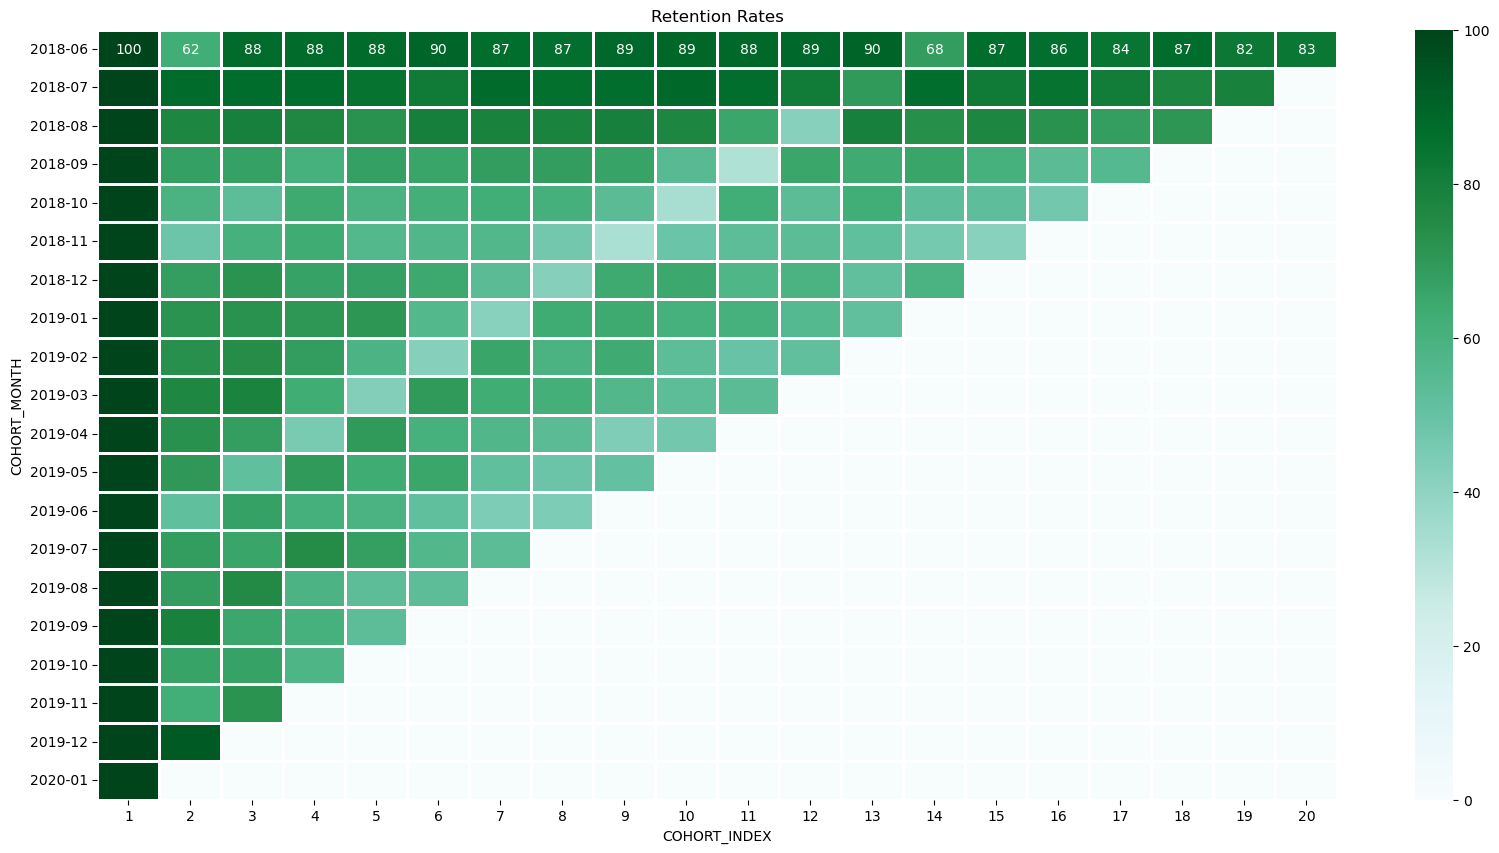

In [116]:
# Plot a heatmap of the retention rates
plt.figure(figsize=(20, 10))
plt.title('Retention Rates')
sns.heatmap(data=retention, 
            annot = True, 
            cmap = 'BuGn',
            fmt = '.0f',
            vmin=0,
            vmax=100,
            linewidths=1,
            )
plt.show()

In [117]:
# Convert total points to int
df['TOTAL_POINTS'] = df['TOTAL_POINTS'].astype(int)

# Calculation of the absolute sum of negative values in the column TOTAL_POINTS for each CUSTOMER_ID
df['POINTS_SPENT'] = df['TOTAL_POINTS'].apply(lambda x: abs(x) if x < 0 else 0)

In [118]:
# Creation of dataframe of POINTS_SPENT per CUSTOMER_ID
points_spent_df = df.groupby('CUSTOMER_ID')['POINTS_SPENT'].sum().reset_index()
points_spent_df.head()

,CUSTOMER_ID,POINTS_SPENT
0,AA00312188,8760
1,AA00312390,2240
2,AA00325975,80675
3,AA00336843,24255
4,AA00339761,4030


In [119]:
# Processing of loyalty points
loyalty = points_spent_df.copy()
loyalty['loyalty_score'] = loyalty['POINTS_SPENT'].apply(lambda x: 1 if x > 0 else 0)
loyalty.head()

,CUSTOMER_ID,POINTS_SPENT,loyalty_score
0,AA00312188,8760,1
1,AA00312390,2240,1
2,AA00325975,80675,1
3,AA00336843,24255,1
4,AA00339761,4030,1


In [120]:
# Creation of new column TRANSACTION_TYPE determined by the following conditions
# If the value in the column QUANTITY is less than or equal to 0 or LIST_PRICE is less than 0, the TRANSACTION_TYPE is 'RETURNED' stored as 0
# If the value in the column QUANTITY is greater than 0 and LIST_PRICE is equal to 0, the TRANSACTION_TYPE is 'PROMOTION' stored as 1
# else the TRANSACTION_TYPE is 'PURCHASE' stored as 2
df['TRANSACTION_TYPE'] = np.where((df['QUANTITY'] <= 0) | (df['LIST_PRICE'] < 0), 0, np.where((df['QUANTITY'] > 0) & (df['LIST_PRICE'] == 0), 1, 2))
df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,MONTH,YEAR,DAY,DAY_OF_WEEK,MONTH_NAME,INVOICE_MONTH,COHORT_MONTH,COHORT_INDEX,POINTS_SPENT,TRANSACTION_TYPE
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,1,2020,17,4,January,2020-01-01,2018-07-01,19,3960,2
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,...,11,2018,9,4,November,2018-11-01,2018-07-01,5,0,2
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,...,1,2020,17,4,January,2020-01-01,2018-07-01,19,3960,2
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565,...,8,2019,16,4,August,2019-08-01,2018-07-01,14,0,2
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430,...,11,2019,10,6,November,2019-11-01,2018-07-01,17,0,2


In [121]:
# Determination of the transaction value via the absolute values of QUANTITY and LIST_PRICE
df['TRANSACTION_VALUE'] = None

# Iterate over each row
for index, row in df.iterrows():
    if row['TRANSACTION_TYPE'] == 1 or row['TRANSACTION_TYPE'] == 2:
        df.at[index, 'TRANSACTION_VALUE'] = abs(row['LIST_PRICE']) * abs(row['QUANTITY'])
    else:
        df.at[index, 'TRANSACTION_VALUE'] = -(abs(row['LIST_PRICE']) * abs(row['QUANTITY']))

df.head()

,CUSTOMER_ID,DATE,PRODUCT_ID,QUANTITY,LIST_PRICE,SPECIAL,OUTLET_ID,PAYMENT_METHOD,TIME,TOTAL_POINTS,...,YEAR,DAY,DAY_OF_WEEK,MONTH_NAME,INVOICE_MONTH,COHORT_MONTH,COHORT_INDEX,POINTS_SPENT,TRANSACTION_TYPE,TRANSACTION_VALUE
0,BF00404312,2020-01-17,1068,1.0,6.85,0,14,CASH,15:06:37,-3960,...,2020,17,4,January,2020-01-01,2018-07-01,19,3960,2,6.85
1,BF00404312,2018-11-09,1068,1.0,6.65,0,14,CASH,18:27:53,315,...,2018,9,4,November,2018-11-01,2018-07-01,5,0,2,6.65
2,BF00404312,2020-01-17,94580,1.0,6.25,0,14,CASH,15:06:37,-3960,...,2020,17,4,January,2020-01-01,2018-07-01,19,3960,2,6.25
3,BF00404312,2019-08-16,94580,1.0,6.25,0,14,CASH,18:49:52,565,...,2019,16,4,August,2019-08-01,2018-07-01,14,0,2,6.25
4,BF00404312,2019-11-10,94580,1.0,6.25,0,14,CASH,14:20:49,430,...,2019,10,6,November,2019-11-01,2018-07-01,17,0,2,6.25


In [131]:
# Determination of day of the week with the highest transaction value order by the day of the week
day_of_week_transaction_value_df = df.groupby('DAY_OF_WEEK')['TRANSACTION_VALUE'].sum()
day_of_week_transaction_value_df.head()

DAY_OF_WEEK
0           9231.35
1    3722316.860009
2     3900839.05001
3    4155274.290012
4    4216975.830012
Name: TRANSACTION_VALUE, dtype: object

In [132]:
# Determination of the hour of the day with the highest transaction value
hour_of_day_transaction_value_df = df.groupby('TRANSACTION_HOUR')['TRANSACTION_VALUE'].sum()
hour_of_day_transaction_value_df.head()

TRANSACTION_HOUR
0    6136.16
1      432.0
2    2097.75
3    2528.65
4    3081.05
Name: TRANSACTION_VALUE, dtype: object

In [133]:
# Creation of new ORIGIN_ column that labels the ORIGIN column as MEMBER_GET_MEMBER - 0, PHONE - 1, STORE - 2, WEB - 3\
df['ORIGIN_'] = df['ORIGIN'].replace({'MEMBER_GET_MEMBER': 0, 'PHONE': 1, 'STORE': 2, 'WEB': 3})

In [134]:
# Determine the ORIGIN_ with the highest transaction value
origin_transaction_value_df = df.groupby('ORIGIN_')['TRANSACTION_VALUE'].sum()
origin_transaction_value_df.head()

ORIGIN_
0           11176.25
1     1031263.659999
2     5622185.940027
3    14115450.099886
Name: TRANSACTION_VALUE, dtype: object

In [137]:
# Determine the region with the highest transaction value
region_transaction_value_df = df.groupby('REGIONAL_CODE')['TRANSACTION_VALUE'].sum()
region_transaction_value_df.head()

REGIONAL_CODE
1    636289.94
2     53381.34
3     809272.7
4    300882.03
5    118778.93
Name: TRANSACTION_VALUE, dtype: object

In [140]:
# Creation of region_, outlet, and category dataframes
# Region_
region_ = df.groupby('CUSTOMER_ID')['REGIONAL_CODE'].agg(lambda x: x.mode()[0] if not x.empty else None).reset_index()
region_.columns = ['CUSTOMER_ID', 'MODE_REGIONAL_CODE']

# Outlet
outlet = df.groupby('CUSTOMER_ID')['OUTLET_ID'].agg(lambda x: x.mode()[0] if not x.empty else None).reset_index()
outlet.columns = ['CUSTOMER_ID', 'OUTLET_ID']

# Category
category = df.groupby('CUSTOMER_ID')['CATEGORY_ID'].agg(lambda x: x.mode()[0] if not x.empty else None).reset_index()
category.columns = ['CUSTOMER_ID', 'CATEGORY_ID']


In [141]:
# Calculate the percentage of SPECIAL column for each customer_id
percentage_special = df.groupby('CUSTOMER_ID')['SPECIAL'].mean() * 100

# Round the values to 7 digits after the decimal point
percentage_special = percentage_special.round(2)

# Create a new table with customer_id and percentage_special columns
percentage_special_table = pd.DataFrame({'CUSTOMER_ID': percentage_special.index, 'Percentage_SPECIAL': percentage_special.values})


# add a new column to percentage_special table where the value is 1 if that customer ever bought a special product, and 0 otherwise
percentage_special_table['SPECIAL'] = percentage_special_table['Percentage_SPECIAL'].apply(lambda x: 1 if x > 0 else 0)

#show rows for percentage_special_table where the percentage_special is greater than 0
percentage_special_table[percentage_special_table['Percentage_SPECIAL']>0].head()


,CUSTOMER_ID,Percentage_SPECIAL,SPECIAL
12,AA00405977,0.89,1
30,AA01398403,0.51,1
32,AA01489475,0.70,1
33,AA01748903,1.03,1
35,AA02912403,0.42,1


In [142]:
# Mean of the SPECIAL column for each customer_id
mean_special = df.groupby('CUSTOMER_ID')['SPECIAL'].mean()
mean_special = mean_special.astype(int)
mean_special_table = pd.DataFrame({'CUSTOMER_ID': mean_special.index, 'Mean_SPECIAL': mean_special.values})

mean_special_table.head()

,CUSTOMER_ID,Mean_SPECIAL
0,AA00312188,0
1,AA00312390,0
2,AA00325975,0
3,AA00336843,0
4,AA00339761,0


In [144]:
origin_mode = df.groupby('CUSTOMER_ID')['ORIGIN_'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
origin_mode.columns = ['CUSTOMER_ID', 'MODE_ORIGIN']

payment_mode = df.groupby('CUSTOMER_ID')['PAYMENT_METHOD_'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
payment_mode.columns = ['CUSTOMER_ID', 'MODE_PAYMENT_METHOD']

transaction_mode = df.groupby('CUSTOMER_ID')['TRANSACTION_HOUR'].apply(lambda x: x.mode()[0] if not x.empty else None).reset_index()
transaction_mode.columns = ['CUSTOMER_ID', 'MODE_TRANSACTION_HOUR']

customer_year = df.groupby('CUSTOMER_ID')['LONGEVITY'].first().reset_index()


In [148]:
snapshot_date = df['DATE'].max() + pd.DateOffset(days=1)

In [149]:
df.columns

Index(['CUSTOMER_ID', 'DATE', 'PRODUCT_ID', 'QUANTITY', 'LIST_PRICE',
       'SPECIAL', 'OUTLET_ID', 'PAYMENT_METHOD', 'TIME', 'TOTAL_POINTS',
       'CATEGORY_ID', 'CATEGORY_DESC', 'CREATION_DATE', 'REGIONAL_CODE',
       'ORIGIN', 'LONGEVITY', 'TRANSACTION_HOUR', 'TIME_OF_DAY', 'MONTH',
       'YEAR', 'DAY', 'DAY_OF_WEEK', 'MONTH_NAME', 'INVOICE_MONTH',
       'COHORT_MONTH', 'COHORT_INDEX', 'POINTS_SPENT', 'TRANSACTION_TYPE',
       'TRANSACTION_VALUE', 'LONGEVITY_YEARS', 'ORIGIN_', 'PAYMENT_METHOD_',
       'BILL_NO', 'RECENCY'],
      dtype='object')

In [151]:
# Determining Recency - Lower the value, the better
recency_datamart = df.groupby('CUSTOMER_ID').agg({'DATE': lambda x: (snapshot_date - x.max()).days}).reset_index()

# Determining Frequency - Higher the value, the better
frequency_datamart = df.groupby('CUSTOMER_ID').agg({'DATE': 'count'}).reset_index()

# Determining Monetary - Higher the value, the better
monetary_datamart = df.groupby('CUSTOMER_ID').agg({'TRANSACTION_VALUE': 'sum'}).reset_index()

# Merge the recency, frequency, and monetary dataframes
rfm_datamart = recency_datamart.merge(frequency_datamart, on = 'CUSTOMER_ID')
rfm_datamart = rfm_datamart.merge(monetary_datamart, on = 'CUSTOMER_ID')

# Rename the columns
rfm_datamart.columns = ['CUSTOMER_ID', 'Recency', 'Frequency', 'Monetary']

RFM = rfm_datamart
RFM.head()

,CUSTOMER_ID,Recency,Frequency,Monetary
0,AA00312188,25,102,1040.45
1,AA00312390,2,58,687.95
2,AA00325975,2,205,1386.3
3,AA00336843,15,69,498.1
4,AA00339761,24,59,574.8


In [152]:
# Merge loyalty points, region_, outlet, category, percentage_special_table, mean_special_table, origin_mode, payment_mode, transaction_mode, weekday_mode, and customer_year
RFM = RFM.merge(loyalty, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(region_, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(outlet, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(category, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(percentage_special_table, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(mean_special_table, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(origin_mode, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(payment_mode, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(transaction_mode, how='inner', on='CUSTOMER_ID')
RFM = RFM.merge(customer_year, how='inner', on='CUSTOMER_ID')


In [153]:
RFM.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,POINTS_SPENT,loyalty_score,MODE_REGIONAL_CODE,OUTLET_ID,CATEGORY_ID,Percentage_SPECIAL,SPECIAL,Mean_SPECIAL,MODE_ORIGIN,MODE_PAYMENT_METHOD,MODE_TRANSACTION_HOUR,LONGEVITY
0,AA00312188,25,102,1040.45,8760,1,11,64,10,0.0,0,0,3,0,14,4709
1,AA00312390,2,58,687.95,2240,1,42,91,3,0.0,0,0,3,0,16,3759
2,AA00325975,2,205,1386.3,80675,1,11,7,1,0.0,0,0,3,3,11,5233
3,AA00336843,15,69,498.1,24255,1,11,6,3,0.0,0,0,3,0,13,1793
4,AA00339761,24,59,574.8,4030,1,6,7,10,0.0,0,0,3,0,17,5481


In [154]:
RFM_ = RFM.copy()
RFM_ = RFM_.drop(['POINTS_SPENT',
       'loyalty_score', 'MODE_REGIONAL_CODE', 'OUTLET_ID', 'CATEGORY_ID',
       'Percentage_SPECIAL', 'SPECIAL', 'Mean_SPECIAL', 'MODE_ORIGIN',
       'MODE_PAYMENT_METHOD', 'MODE_TRANSACTION_HOUR', 'LONGEVITY'], axis=1)

In [155]:
RFM_.head()

,CUSTOMER_ID,Recency,Frequency,Monetary
0,AA00312188,25,102,1040.45
1,AA00312390,2,58,687.95
2,AA00325975,2,205,1386.3
3,AA00336843,15,69,498.1
4,AA00339761,24,59,574.8


In [158]:
# Recency quartile
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(RFM_['Recency'], 4, labels = r_labels)
RFM_ = RFM_.assign(R = r_quartiles.values)

# Frequency quartile
f_labels = range(1, 5)
f_quartiles = pd.qcut(RFM_['Frequency'], 4, labels = f_labels)
RFM_ = RFM_.assign(F = f_quartiles.values)

# Monetary quartile
m_labels = range(1, 5)
RFM_['Monetary'] = pd.to_numeric(RFM_['Monetary'], errors='coerce')
m_quartiles = pd.qcut(RFM_['Monetary'], 4, labels = m_labels)
RFM_ = RFM_.assign(M = m_quartiles.values)

RFM_.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,R,F,M
0,AA00312188,25,102,1040.45,2,3,4
1,AA00312390,2,58,687.95,4,2,3
2,AA00325975,2,205,1386.30,4,4,4
3,AA00336843,15,69,498.10,2,3,2
4,AA00339761,24,59,574.80,2,2,3


In [159]:
def merge_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
RFM_['RFM_Segment'] = RFM_.apply(merge_rfm, axis=1)
RFM_['RFM_Score'] = RFM_[['R', 'F', 'M']].sum(axis = 1)

RFM_.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
0,AA00312188,25,102,1040.45,2,3,4,234,9
1,AA00312390,2,58,687.95,4,2,3,423,9
2,AA00325975,2,205,1386.30,4,4,4,444,12
3,AA00336843,15,69,498.10,2,3,2,232,7
4,AA00339761,24,59,574.80,2,2,3,223,7


In [161]:
RFM_.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3           141.1      17.2    126.5  3101
4            50.1      23.1    190.7  1940
5            52.3      34.7    299.6  2258
6            26.4      40.3    370.4  2817
7            27.2      55.4    520.1  2332
8            17.6      67.0    653.8  2746
9            15.5      88.3    907.7  2507
10           10.2     109.9   1144.6  2879
11            9.0     166.3   1755.0  2911
12            3.9     189.4   2061.8  2236

In [183]:
# Add the segment labels as Platinum, Gold, Silver, Bronze based on the RFM_Score as segment_me
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Platinum'
    elif (df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9):
        return 'Gold'
    elif (df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8):
        return 'Silver'
    else:
        return 'Bronze'
    
RFM_['General_Segment'] = RFM_.apply(segment_me, axis=1)
RFM_.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

Recency Frequency Monetary       
                   mean      mean     mean  count
General_Segment                                  
Bronze             71.9      28.6    245.4  10116
Gold               17.6      67.0    653.8   2746
Platinum            9.8     137.2   1451.6  10533
Silver             27.2      55.4    520.1   2332

In [184]:
# Check the unique value of the RFM_Segment
RFM_['RFM_Segment'].unique()

array(['234', '423', '444', '232', '223', '333', '224', '133', '334',
       '222', '122', '323', '111', '433', '344', '422', '211', '434',
       '322', '311', '411', '244', '112', '233', '243', '432', '421',
       '321', '332', '132', '123', '212', '121', '424', '443', '343',
       '221', '134', '144', '414', '412', '413', '113', '312', '124',
       '114', '213', '241', '143', '242', '324', '314', '313', '214',
       '342'], dtype=object)

In [185]:
# Review the RFM_ dataframe
RFM_.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,AA00312188,25,102,1040.45,2,3,4,234,9,Platinum
1,AA00312390,2,58,687.95,4,2,3,423,9,Platinum
2,AA00325975,2,205,1386.30,4,4,4,444,12,Platinum
3,AA00336843,15,69,498.10,2,3,2,232,7,Silver
4,AA00339761,24,59,574.80,2,2,3,223,7,Silver


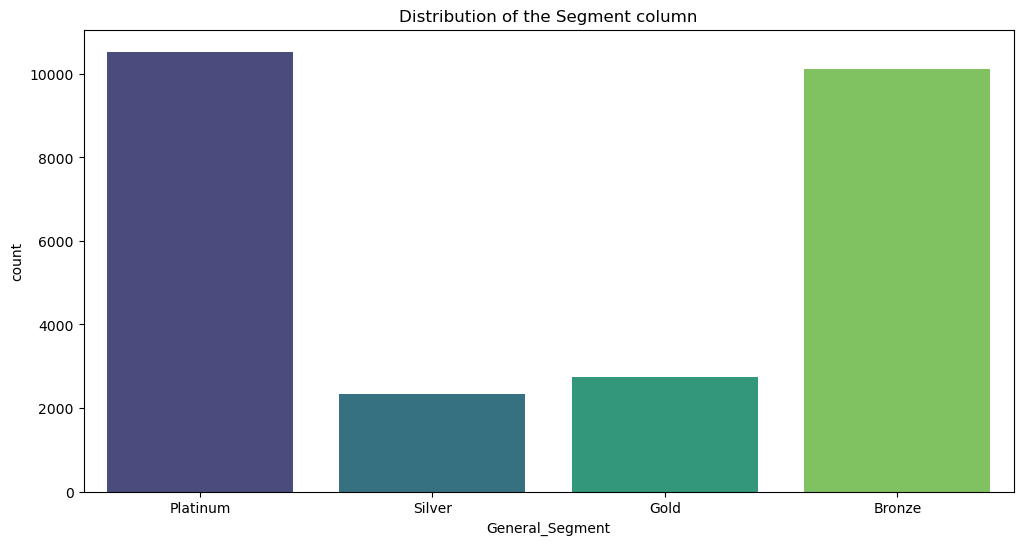

In [191]:
# Plot the distribution of the General_Segment column
plt.figure(figsize=(12, 6))
sns.countplot(data=RFM_, x='General_Segment', palette='viridis')
plt.title('Distribution of the Segment column')
plt.show()

In [192]:
# Merge RFM with the RFM_ dataframe without column repetition
RFM_Final = RFM.merge(RFM_, how='inner', on='CUSTOMER_ID')
RFM_Final.head()

,CUSTOMER_ID,Recency_x,Frequency_x,Monetary_x,POINTS_SPENT,loyalty_score,MODE_REGIONAL_CODE,OUTLET_ID,CATEGORY_ID,Percentage_SPECIAL,...,LONGEVITY,Recency_y,Frequency_y,Monetary_y,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,AA00312188,25,102,1040.45,8760,1,11,64,10,0.0,...,4709,25,102,1040.45,2,3,4,234,9,Platinum
1,AA00312390,2,58,687.95,2240,1,42,91,3,0.0,...,3759,2,58,687.95,4,2,3,423,9,Platinum
2,AA00325975,2,205,1386.3,80675,1,11,7,1,0.0,...,5233,2,205,1386.30,4,4,4,444,12,Platinum
3,AA00336843,15,69,498.1,24255,1,11,6,3,0.0,...,1793,15,69,498.10,2,3,2,232,7,Silver
4,AA00339761,24,59,574.8,4030,1,6,7,10,0.0,...,5481,24,59,574.80,2,2,3,223,7,Silver


In [193]:
# Check the values of the _x and _y columns are the same on each row
RFM_Final['Recency_x'] = RFM_Final['Recency_x'].astype(int)
RFM_Final['Frequency_x'] = RFM_Final['Frequency_x'].astype(int)
RFM_Final['Monetary_x'] = RFM_Final['Monetary_x'].astype(int)

# Drop the _x columns
RFM_Final = RFM_Final.drop(['Recency_y', 'Frequency_y', 'Monetary_y'], axis=1)

# Rename the _y columns
RFM_Final.rename(columns={'Recency_x': 'Recency'}, inplace=True)
RFM_Final.rename(columns={'Frequency_x': 'Frequency'}, inplace=True)
RFM_Final.rename(columns={'Monetary_x': 'Monetary'}, inplace=True)

RFM_Final.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,POINTS_SPENT,loyalty_score,MODE_REGIONAL_CODE,OUTLET_ID,CATEGORY_ID,Percentage_SPECIAL,...,MODE_ORIGIN,MODE_PAYMENT_METHOD,MODE_TRANSACTION_HOUR,LONGEVITY,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,AA00312188,25,102,1040,8760,1,11,64,10,0.0,...,3,0,14,4709,2,3,4,234,9,Platinum
1,AA00312390,2,58,687,2240,1,42,91,3,0.0,...,3,0,16,3759,4,2,3,423,9,Platinum
2,AA00325975,2,205,1386,80675,1,11,7,1,0.0,...,3,3,11,5233,4,4,4,444,12,Platinum
3,AA00336843,15,69,498,24255,1,11,6,3,0.0,...,3,0,13,1793,2,3,2,232,7,Silver
4,AA00339761,24,59,574,4030,1,6,7,10,0.0,...,3,0,17,5481,2,2,3,223,7,Silver


In [195]:
# Drop unnecessary columns: 'MODE_REGIONAL_CODE', 'OUTLET_ID', 'CATEGORY_ID', 'Percentage_SPECIAL', 'SPECIAL', 'Mean_SPECIAL', 'MODE_ORIGIN', 'MODE_PAYMENT_METHOD', 'MODE_TRANSACTION_HOUR'
RFM_Final = RFM_Final.drop(['MODE_REGIONAL_CODE', 'OUTLET_ID', 'CATEGORY_ID', 'Percentage_SPECIAL', 'SPECIAL', 'Mean_SPECIAL', 'MODE_ORIGIN', 'MODE_PAYMENT_METHOD', 'MODE_TRANSACTION_HOUR'], axis=1)

In [197]:
# Create new csv file from RFM_Final
RFM_Final.to_csv('./datasets/1_SEGMENTATION/RFM_Final.csv', index=False)